<a href="https://colab.research.google.com/github/AJ-CE888/Ce888/blob/master/Lab_7_CNN_Human_vs_horses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Code :
# classify whether images contain either a human or a horse.

In [ ]:
import os

In [2]:
!git clone https://github.com/sagihaider/CE888_2020.git

Cloning into 'CE888_2020'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 25146 (delta 28), reused 4 (delta 0), pack-reused 25082
Receiving objects: 100% (25146/25146), 561.99 MiB | 43.37 MiB/s, done.
Resolving deltas: 100% (64/64), done.


In [ ]:
# Upload data
from zipfile import ZipFile
file_name = "/content/CE888_2020/Lab_8/data.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

In [ ]:
!rm -R "/content/data/cats"
!rm -R "/content/data/dogs"

In [ ]:
# Create primary data directories

data_dir_list = os.listdir("/content/data/")

path, dirs, H_files = next(os.walk("/content/data/Humans"))
path, dirs, h_files = next(os.walk("/content/data/horses"))

H_file_count = len(H_files)
h_file_count = len(h_files)

print(H_file_count)
print(h_file_count)

In [ ]:
base_dir = '/content/Humans_and_horses'
os.mkdir(base_dir)

In [ ]:
# Making directories to devide the data to train, test and validation sets

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_Humans_dir = os.path.join(train_dir, 'Humans')
os.mkdir(train_Humans_dir)

train_horses_dir = os.path.join(train_dir, 'horses')
os.mkdir(train_horses_dir)

validation_Humans_dir = os.path.join(validation_dir, 'Humans')
os.mkdir(validation_Humans_dir)

validation_horses_dir = os.path.join(validation_dir, 'horses')
os.mkdir(validation_horses_dir)

test_Humans_dir = os.path.join(test_dir, 'Humans')
os.mkdir(test_Humans_dir)

test_horses_dir = os.path.join(test_dir, 'horses')
os.mkdir(test_horses_dir)

In [ ]:
H_original_dataset_dir = '/content/data/Humans/'
h_original_dataset_dir = '/content/data/horses/'

In [ ]:
# Deviding the data to train, test and validation sets

import shutil
fnames = ['rider-{}.jpg'.format(i) for i in range(1,160)]
for fname in fnames:
    src = os.path.join(H_original_dataset_dir, fname)
    dst = os.path.join(train_Humans_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['rider-{}.jpg'.format(i) for i in range(160, 180)]
for fname in fnames:
    src = os.path.join(H_original_dataset_dir, fname)
    dst = os.path.join(validation_Humans_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(180, 202)]
for fname in fnames:
    src = os.path.join(H_original_dataset_dir, fname)
    dst = os.path.join(test_Humans_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['horse-{}.jpg'.format(i) for i in range(1,160)]
for fname in fnames:
    src = os.path.join(h_original_dataset_dir, fname)
    dst = os.path.join(train_horses_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(160, 180)]
for fname in fnames:
    src = os.path.join(h_original_dataset_dir, fname)
    dst = os.path.join(validation_horses_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(180, 202)]
for fname in fnames:
    src = os.path.join(h_original_dataset_dir, fname)
    dst = os.path.join(test_horses_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
print('total training cat images:', len(os.listdir(train_Humans_dir)))
print('total training dog images:', len(os.listdir(train_horses_dir)))
print('total validation cat images:', len(os.listdir(validation_Humans_dir)))

print('total validation dog images:', len(os.listdir(validation_horses_dir)))
print('total test cat images:', len(os.listdir(test_Humans_dir)))
print('total test dog images:', len(os.listdir(test_horses_dir)))

In [ ]:
# Creating CNN model 

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

In [ ]:
# Compiling CNN model 

from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
# Preprocessing the images to be used by CNN

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

In [ ]:
# Fitting the CNN with the preprocesed data

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=10)

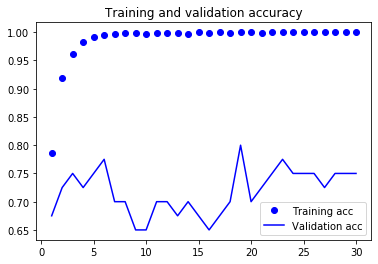

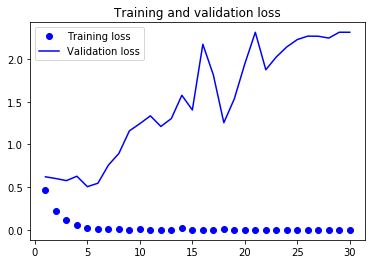

In [43]:
# Saving the CNN model

model.save('Human_vs_horses.h5')

# Plotting the CNN accuracy and loss

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Creating second CNN model 

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
# Preprocessing the images to be used by second CNN

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')

# Fitting the CNN with the preprocesed data

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=50)

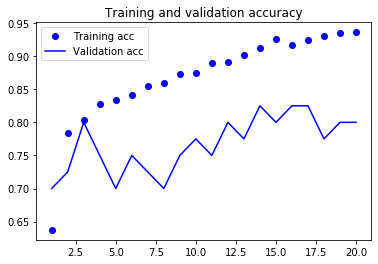

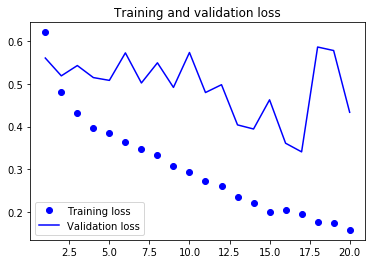

In [46]:
# Saving the second CNN model

model.save('Human_vs_horses_2.h5')

# Plotting the CNN accuracy and loss

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# End